# Corpus Linguistic II

In [1]:
import nltk
nltk.download('shakespeare')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import shakespeare #XMLCorpusreader

import pandas as pd

[nltk_data] Downloading package shakespeare to /home/mark/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
result_frames = []

In [3]:
pd.options.display.max_colwidth = 20
for book in shakespeare.fileids():
    play = shakespeare.xml(book)
    tmp = pd.DataFrame(
        [(line.text, speech.find("SPEAKER").text,
        play.find("TITLE").text,
        a_index,
        s_index)
        for a_index, act
        in enumerate(play.findall('ACT'), start=1)
        for s_index,scene
        in enumerate(act.findall('SCENE'), start=1)
        for speech
        in scene.findall('SPEECH')
        for line
        in speech.findall("LINE")],
            columns =['Line', 'Speaker', 'Title','Act','Scene'])
    result_frames.append(tmp)
    
result = pd.concat(result_frames)
result.replace(to_replace=[None], value="", inplace=True)
result

,Line,Speaker,Title,Act,Scene
0,"Nay, but this do...",PHILO,The Tragedy of A...,1,1
1,O'erflows the me...,PHILO,The Tragedy of A...,1,1
2,That o'er the fi...,PHILO,The Tragedy of A...,1,1
3,Have glow'd like...,PHILO,The Tragedy of A...,1,1
4,The office and d...,PHILO,The Tragedy of A...,1,1
...,...,...,...,...,...
3060,"The sun, for sor...",PRINCE,The Tragedy of R...,5,3
3061,"Go hence, to hav...",PRINCE,The Tragedy of R...,5,3
3062,Some shall be pa...,PRINCE,The Tragedy of R...,5,3
3063,For never was a ...,PRINCE,The Tragedy of R...,5,3


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

In [5]:
STOPS = [
    "afore",
    "ake",
    "an",
    "because",
    "ek",
    "fore",
    "for",
    "forthi",
    "whan",
    "whanne",
    "whilis",
    "if",
    "yf",
    "yif",
    "yiff",
    "yit",
    "yet",
    "and",
    "or",
    "any",
    "but",
    "a",
    "y",
    "ne",
    "no",
    "not",
    "nor",
    "nat",
    "however",
    "o",
    "than",
    "n",
    "nn",
    "nnn",
    "to",
    "with",
    "wyth",
    "at",
    "as",
    "of",
    "off",
    "from",
    "on",
    "before",
    "by",
    "after",
    "about",
    "above",
    "across",
    "among",
    "against",
    "below",
    "between",
    "during",
    "into",
    "in",
    "out",
    "over",
    "under",
    "abord",
    "aboven",
    "afore",
    "aftir",
    "bi",
    "bifor",
    "bisyde",
    "bitwixten",
    "byfore",
    "bytwene",
    "down",
    "doun",
    "embe",
    "fra",
    "ine",
    "mid",
    "sanz",
    "tyll",
    "umbe",
    "vnto",
    "vpon",
    "withouten",
    "with",
    "wth",
    "wtout",
    "can",
    "cannot",
    "can't",
    "t",
    "could",
    "did",
    "do",
    "does",
    "wyl",
    "will",
    "would",
    "haven",
    "hast",
    "haþ",
    "havende",
    "hadde",
    "haddest",
    "hadden",
    "had",
    "hadn't",
    "has",
    "hasn't",
    "hasn",
    "have",
    "haven't",
    "haven",
    "having",
    "be",
    "ben",
    "been",
    "am",
    "art",
    "is",
    "ys",
    "aren",
    "are",
    "aren't",
    "bende",
    "isn't",
    "isn",
    "wæs",
    "was",
    "wasn't",
    "wasn",
    "weren",
    "were",
    "weren't",
    "þe",
    "the",
    "þat",
    "þenne",
    "þis",
    "whiche",
    "which",
    "while",
    "who",
    "whom",
    "what",
    "when",
    "where",
    "why",
    "that",
    "that's",
    "s",
    "there",
    "ther",
    "þer",
    "there's",
    "these",
    "this",
    "those",
    "boþe",
    "thilke",
    "eiþer",
    "either",
    "neither",
    "al",
    "all",
    "also",
    "ane",
    "ic",
    "ich",
    "i",
    "i'd",
    "d",
    "i'll",
    "ll",
    "i'm",
    "m",
    "i've",
    "ve",
    "me",
    "mi",
    "my",
    "minen",
    "min",
    "mire",
    "minre",
    "myself",
    "þu",
    "þou",
    "tu",
    "þeou",
    "thi",
    "you",
    "þe",
    "þi",
    "ti",
    "þin",
    "þyn",
    "þeself",
    "you'd",
    "you'll",
    "you're",
    "re",
    "you've",
    "your",
    "yours",
    "yourself",
    "yourselves",
    "thee",
    "thy",
    "thou",
    "ye",
    "thine",
    "he",
    "he'd",
    "he'll",
    "he's",
    "she",
    "sche",
    "she'd",
    "she'll",
    "she's",
    "her",
    "heo",
    "hie",
    "hies",
    "hire",
    "hir",
    "hers",
    "hio",
    "heore",
    "herself",
    "him",
    "hine",
    "hisse",
    "hes",
    "himself",
    "his",
    "hys",
    "hym",
    "hit",
    "yt",
    "it",
    "its",
    "it's",
    "tis",
    "twas",
    "itself",
    "þay",
    "youre",
    "hyr",
    "hem",
    "we",
    "we'd",
    "we'll",
    "we're",
    "we've",
    "us",
    "ous",
    "our",
    "ure",
    "ures",
    "urne",
    "ours",
    "oures",
    "ourselves",
    "their",
    "theirs",
    "them",
    "themselves",
    "thai",
    "thei",
    "they",
    "they'd",
    "they'll",
    "they're",
    "they've",
    "whan",
]

In [6]:
import string
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [7]:
vect = CountVectorizer(tokenizer=tokenize, lowercase=True,
    stop_words = STOPS + stopwords.words('english'))
vects = vect.fit_transform(result.Line.tolist())

/home/mark/Downloads/ENTER/envs/dphil/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/mark/Downloads/ENTER/envs/dphil/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'cant', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'id', 'ill', 'im', 'isnt', 'ive', 'mightnt', 'mustnt', 'neednt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'shouldve', 'thatll', 'thats', 'theyd', 'theyll', 'theyre', 'theyve', 'u', 'wa', 'wasnt', 'wed', 'well', 'werent', 'weve', 'wont', 'wouldnt', 'youd', 'youll', 'youve'] not in stop_words.
  warnings.warn(


In [8]:
print('DTM size: ', vects.shape)

DTM size:  (23998, 10792)


# Word Frequencies

In [9]:
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import numpy as np

def tokenize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [10]:
vocab = ["love","death"]
vect = CountVectorizer(vocabulary = vocab, tokenizer=tokenize,
    lowercase=True,
    stop_words = STOPS + stopwords.words('english'))

vects = vect.fit_transform(result.Line.tolist())

/home/mark/Downloads/ENTER/envs/dphil/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/mark/Downloads/ENTER/envs/dphil/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'cant', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'hed', 'hell', 'id', 'ill', 'im', 'isnt', 'ive', 'mightnt', 'mustnt', 'neednt', 'shant', 'shed', 'shell', 'shes', 'shouldnt', 'shouldve', 'thatll', 'thats', 'theyd', 'theyll', 'theyre', 'theyve', 'u', 'wa', 'wasnt', 'wed', 'well', 'werent', 'weve', 'wont', 'wouldnt', 'youd', 'youll', 'youve'] not in stop_words.
  warnings.warn(


In [11]:
print('DTM size: ', vects.shape)

DTM size:  (23998, 2)


In [12]:
result = result.reset_index(drop=True)
word_result = pd.concat([result,
    pd.DataFrame(data=vects.toarray(),
    columns = vect.get_feature_names_out())],axis=1)

word_result

,Line,Speaker,Title,Act,Scene,love,death
0,"Nay, but this do...",PHILO,The Tragedy of A...,1,1,0,0
1,O'erflows the me...,PHILO,The Tragedy of A...,1,1,0,0
2,That o'er the fi...,PHILO,The Tragedy of A...,1,1,0,0
3,Have glow'd like...,PHILO,The Tragedy of A...,1,1,0,0
4,The office and d...,PHILO,The Tragedy of A...,1,1,0,0
...,...,...,...,...,...,...,...
23993,"The sun, for sor...",PRINCE,The Tragedy of R...,5,3,0,0
23994,"Go hence, to hav...",PRINCE,The Tragedy of R...,5,3,0,0
23995,Some shall be pa...,PRINCE,The Tragedy of R...,5,3,0,0
23996,For never was a ...,PRINCE,The Tragedy of R...,5,3,0,0


In [13]:
word_result = word_result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"')\
    .groupby("Act").agg(
    sum_death = ('death','sum'),
    sum_love = ('love','sum'),
    ).reset_index()

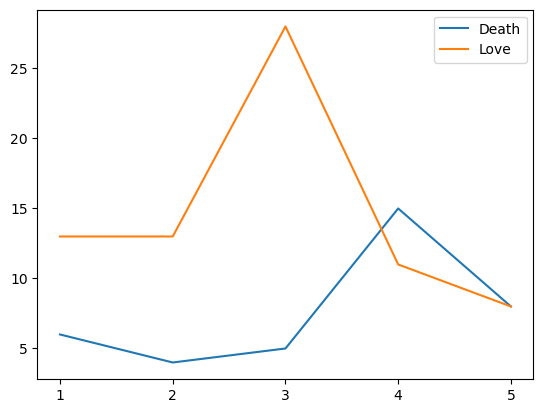

In [14]:
plt.close("all")
plt.figure()
plt.plot(figsize=(10,10))

plt.plot(word_result.Act, word_result.sum_death, label="Death")
plt.plot(word_result.Act, word_result.sum_love, label="Love")
plt.xticks(np.arange(min(word_result.Act),max(word_result.Act)+1,1))

plt.legend()
plt.show()

# Collocation

In [15]:
from nltk.collocations import *
hamlet_df = result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"')
hamlet_df["tokenized"] = hamlet_df.apply(lambda x: [w.lower()
    for w in tokenize(x['Line'])
    if w.isalpha()], axis=1)

/tmp/ipykernel_6043/3838911152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hamlet_df["tokenized"] = hamlet_df.apply(lambda x: [w.lower()


In [16]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder\
    .from_documents(documents=hamlet_df["tokenized"].tolist())
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 50)

[('christian', 'burial'),
 ('humbly', 'thank'),
 ('ist', 'possible'),
 ('mobled', 'queen'),
 ('bloody', 'deed'),
 ('second', 'husband'),
 ('young', 'fortinbras'),
 ('wait', 'upon'),
 ('two', 'month'),
 ('stronger', 'than'),
 ('am', 'glad'),
 ('old', 'norway'),
 ('seen', 'tonight'),
 ('hell', 'itself'),
 ('mine', 'uncle'),
 ('cousin', 'hamlet'),
 ('thou', 'liest'),
 ('set', 'down'),
 ('were', 'sent'),
 ('any', 'thing'),
 ('hath', 'laid'),
 ('nunnery', 'go'),
 ('thou', 'shalt'),
 ('father', 'lost'),
 ('get', 'thee'),
 ('brought', 'them'),
 ('ay', 'marry'),
 ('wouldst', 'thou'),
 ('hold', 'off'),
 ('dost', 'thou'),
 ('thou', 'hast'),
 ('wilt', 'thou'),
 ('dead', 'body'),
 ('every', 'man'),
 ('mine', 'own'),
 ('did', 'seem'),
 ('be', 'ruled'),
 ('be', 'wi'),
 ('your', 'lordship'),
 ('wager', 'on'),
 ('had', 'seen'),
 ('ti', 'true'),
 ('shall', 'obey'),
 ('make', 'haste'),
 ('too', 'much'),
 ('an', 'act'),
 ('come', 'hither'),
 ('thou', 'art'),
 ('his', 'weapon'),
 ('go', 'seek')]

In [17]:
from nltk.text import Text
text = Text([token for tokens in hamlet_df["tokenized"].tolist()
    for token in tokens])
text.concordance("burial")

Displaying 4 of 4 matches:
ow is she to be buried in christian burial that wilfully seek her own salvatio
th sat on her and find it christian burial how can that be unless she drowned 
ld have been buried out o christian burial why there thou sayst and the more p
s and the bringing home of bell and burial must there no more be done no more 


In [18]:
from nltk.text import Text

concordances_result = []

for i in range(len(hamlet_df["tokenized"])):
    text = Text(hamlet_df["tokenized"].tolist()[i])
    concordance = text.concordance_list("death")
    if(len(concordance)>0):
        concordances_result.append(
            (concordance[0].left,
            concordance[0].query,
            concordance[0].right,
            hamlet_df.iloc[[i]].Title.tolist()[0],
            hamlet_df.iloc[[i]].Act.tolist()[0],
            hamlet_df.iloc[[i]].Scene.tolist()[0]))
        
concordance_df = pd.DataFrame(concordances_result,
    columns =['Left','Query','Right', 'Title', 'Act',"Scene"])
concordance_df.query("Act == 3")

,Left,Query,Right,Title,Act,Scene
10,"[for, in, that, ...",death,"[what, dream, ma...",The Tragedy of H...,3,1
11,"[but, that, the,...",death,[],The Tragedy of H...,3,1
12,"[which, i, have,...",death,[],The Tragedy of H...,3,2
13,"[o, wretched, st...",death,[],The Tragedy of H...,3,3
14,[the],death,"[i, gave, him, s...",The Tragedy of H...,3,4


In [19]:
from nltk.text import Text

hamlet_df = result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"')
tokenized = hamlet_df.apply(lambda x: [w.lower()
    for w in tokenize(x['Line']) if w.isalpha()], axis=1)

concordances_result = []

for i in range(len(tokenized)):
    text = Text(tokenized.tolist()[i])
    concordance = text.concordance_list("death")
    if(len(concordance)>0):
        concordances_result.append(
            (concordance[0].line,
            hamlet_df.iloc[[i]].Title.tolist()[0],
            hamlet_df.iloc[[i]].Act.tolist()[0],
            hamlet_df.iloc[[i]].Scene.tolist()[0]))

concordance_df = pd.DataFrame(concordances_result,
    columns =['Line', 'Title', 'Act',"Scene"])
concordance_df

,Line,Title,Act,Scene
0,hich they say yo...,The Tragedy of H...,1,1
1,hough yet of ham...,The Tragedy of H...,1,2
2,or thinking by o...,The Tragedy of H...,1,2
3,is death of fath...,The Tragedy of H...,1,2
4,why thy canonize...,The Tragedy of H...,1,4
5,is by a forged p...,The Tragedy of H...,1,5
6,more than his fa...,The Tragedy of H...,2,2
7,his father death...,The Tragedy of H...,2,2
8,as hush a death ...,The Tragedy of H...,2,2
9,time after your ...,The Tragedy of H...,2,2


# Test Significance

In [20]:
import pandas as pd

def chi_test(word_count1, word_count2, total1, total2):
    other1 = total1 - word_count1
    other2 = total2 - word_count2
    word_count1_E = ((word_count1 + word_count2) * total1) / (total1 + total2)
    word_count2_E = ((word_count1 + word_count2) * total2) / (total1 + total2)
    other1_E = ((other1 + other2) * total1) / (total1 + total2)
    other2_E = ((other1 + other2) * total2) / (total1 + total2)
    chi2 = (word_count1 - word_count1_E)**2/word_count1_E + \
        (word_count2 - word_count2_E)**2/word_count2_E + \
        (other1 - other1_E)**2/other1_E + \
        (other2 - other2_E)**2/other2_E
    return chi2

vect = CountVectorizer(tokenizer=tokenize, lowercase=True)
vects = vect.fit_transform(result.Line.tolist())

/home/mark/Downloads/ENTER/envs/dphil/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
word_result = pd.concat([result,
                         pd.DataFrame(data=vects.toarray(),columns = vect.get_feature_names_out())],axis=1)

hamlet_counts_death = word_result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"').death.sum()
dream_counts_death = word_result.query('Title == "A Midsummer Night\'s Dream"').death.sum()

: 

: 

In [ ]:
word_result

In [ ]:
chi_death = chi_test(
    hamlet_counts_death,
    dream_counts_death,
    word_result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"')\
        .iloc[:,5:].sum().sum(),
    word_result.query('Title == "A Midsummer Night\'s Dream"')\
        .iloc[:,5:].sum().sum())

hamlet_counts_love = word_result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"').l
dream_counts_love = word_result.query('Title == "A Midsummer Night\'s Dream"').love.sum()

chi_love = chi_test(
    hamlet_counts_love,
    dream_counts_love,
    word_result.query('Title == "The Tragedy of Hamlet, Prince of Denmark"').iloc[:,5:].sum().sum
    word_result.query('Title == "A Midsummer Night\'s Dream"').iloc[:,5:].sum().sum())

print('Death: {chi_death} ({hamlet_counts_death}/{dream_counts_death}), Love: {chi_love} ({hamlet_counts_love}/{dream_counts_death})')

: 